<a href="https://colab.research.google.com/github/djdunc/housemill/blob/master/data/stats-for-events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


-----------------------
Chi-squared test is used to test if there is any significant difference
between the monthly event counts for each dataset
       Dataset 1  Dataset 2
Month                      
1              8        3.0
2             18        8.0
3             19        6.0
4             16        9.0
5             12        0.0
7              4        0.0
8              7        3.0
9             11        6.0
10            23        7.0
11            12        0.0
12             6        0.0

Chi-squared statistic: 14.979943992954375
P-value: 0.13279477489000327
There is no significant difference between the two datasets.

-----------------------
Shaprio Wilk is testing for normality in the data
Will test each dataset separately to see if data is normally distributed

Shapiro-Wilk statistic: 0.928
P-value: 0.000
136 The data is not normally distributed.

Shapiro-Wilk statistic: 0.927
P-value: 0.011
43 The data is not normally distributed.

-----------------------
Mann Whi

<ipython-input-20-4d474bc07824>:118: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([contingency_table['Dataset 1'], contingency_table['Dataset 2']],


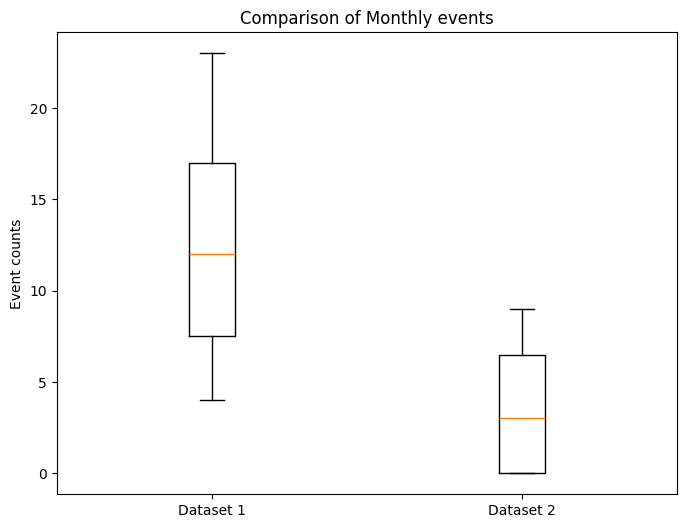

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

try:
    df1 = pd.read_csv("136-flooding-high-tides-touching-floorboards.csv")
    df2 = pd.read_csv("42-flooding-high-tides-touching-floorboards.csv")
except FileNotFoundError:
    print("Error: One or both files not found. Please check the file paths.")
    exit()



print()
print("-----------------------")
print("Chi-squared test is used to test if there is any significant difference")
print("between the monthly event counts for each dataset")

# Convert 'Time' column to datetime objects
df1['Time'] = pd.to_datetime(df1['Time'])
df2['Time'] = pd.to_datetime(df2['Time'])

# Extract month from the 'Time' column
df1['Month'] = df1['Time'].dt.month
df2['Month'] = df2['Time'].dt.month

# Calculate monthly totals for each dataset
observed1 = df1['Month'].value_counts().sort_index()
observed2 = df2['Month'].value_counts().sort_index()

# Create a contingency table
contingency_table = pd.DataFrame({
    'Dataset 1': observed1,
    'Dataset 2': observed2
}).fillna(0)  # Replace NaN with 0

print(contingency_table)

# Perform the Chi-squared test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

print()

print("Chi-squared statistic:", chi2_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference between the two datasets.")
else:
    print("There is no significant difference between the two datasets.")

print()
print("-----------------------")
print("Shaprio Wilk is testing for normality in the data")
print("Will test each dataset separately to see if data is normally distributed")
print()
    # Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df1['Sonar Distance Measure (mm)'])

# Print the results
print(f"Shapiro-Wilk statistic: {statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("136 The data is normally distributed.")
else:
    print("136 The data is not normally distributed.")

print()
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df2['Sonar Distance Measure (mm)'])

# Print the results
print(f"Shapiro-Wilk statistic: {statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("43 The data is normally distributed.")
else:
    print("43 The data is not normally distributed.")


print()
print("-----------------------")
print("Mann Whitney U test is used to test if the distributions")
print("of the two datasets are consistently (significantly) different")


# Extract the relevant data (Sonar Distance Measure)
#data1 = df1['Sonar Distance Measure (mm)']
#data2 = df2['Sonar Distance Measure (mm)']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(observed1, observed2)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant (consistent) difference between the two groups.")
else:
    print("There is no statistically significant (consistent) difference between the two groups.")

print()

# Create box plots
plt.figure(figsize=(8, 6))
plt.boxplot([contingency_table['Dataset 1'], contingency_table['Dataset 2']],
            labels=['Dataset 1', 'Dataset 2'])
plt.ylabel('Event counts')
plt.title('Comparison of Monthly events')
plt.show()


